# Text Analysis and Classification of Reviews in Python
## Classification Model for Sentiment Analysis of Reviews - Case Study

Text Analysis is an important application of machine learning algorithms. Since the raw text or a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with proper dimensions rather than the raw text documents which is an example of unstructured data. For Classification you will be using Machine Learning Algorithms such as Logistic Regression. You will also be using some NLP techniques such as [count Vectorizer](https://www.datacamp.com/community/tutorials/scikit-learn-fake-news) and [Term Frequency-Inverse document Matrix (TF-IDF)](https://www.datacamp.com/community/tutorials/scikit-learn-fake-news). You will be using a reviews and ratings data available [here](http://jmcauley.ucsd.edu/data/amazon/) but since the data is huge, to make things bit easier for you, use a subset that you can also download from our Github Repo [Github_Repo]().     
Okay, so for give it a start you will be following some steps mentioned below:  

1. Data Preparation, In this section you will prepare our data from simple text and ratings to a matrix that is acceptable by Machine Learning Algorithms. 
2. Applying NLP techniques to extract features out of text such as Tokenization and TF-IDF you will be using [scikit learn](). 
3. Building a Classification Model. 
4. Evaluating Model 
5. Finally Predicting a new review that even you can write by yourself (but beware the words you use in your review should be there in training set, else you will get an Error!).

## Data Preparation
Let us Start by loading the dataset using  `pandas.read_csv()` function and also importing pandas and numpy which is required during data preparation. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Amazon_reviews.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
1,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
2,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
3,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
4,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


## Encoding Sentiments 
To avoid errors in further steps like the modeling part it is better to drop rows which have missing values. Now, the question is how you can define a review to be a positive one or a negative, so for this you are creating a binary variable "Positively_Rated" in which 1 signifies a review is Positively rated and 0 means Negative rated, adding it to our dataset.   A simple rule to mark a positive and negative rating can be obtained by selecting rating > 3 as 1 (positively rated) and others as 0 (Negatively rated) removing neutral ratings which is equal to 3.

In [2]:
# Drop missing values
df.dropna(inplace=True)
df = df[df['Rating']!= 3]
df['Positively_Rated'] = np.where(df['Rating']>3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively_Rated
1,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
2,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
3,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
4,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
5,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
6,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
7,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
9,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
10,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
11,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


## Class Proportion 
Using simple Pandas Crosstab function you can have a look of what proportion of observations are positively and negatively rated. 
This step helps a lot while during the modeling part since it is important to know class imbalance before you start building model. Class imbalance affects your model, if you have quite less amount of observations for a certain class over other classes, which at the end becomes difficult for an algorithm to learn and differentiate among other classes due to lack of examples. 

In [3]:
pd.crosstab(index = df['Positively_Rated'], columns="Total count")

col_0,Total count
Positively_Rated,
0,7771
1,22966


Since the difference is not huge let the proportion be same as this, if the difference in proportion is huge such as 90% of data belongs to one class and 10% belongs to other then it creates some trouble, in our case it is roughly around 34% which is Okay. You can use `sklearn.model_selection.StratifiedShuffleSplit()` for correcting imbalanced classes, The splits are done by preserving the percentage of samples for each class.

## Splitting Data in to Train and Test Set
Splitting Train and Test Set, you are going to split using scikit learn `sklearn.model_selection.train_test_split()` which is random split of datset in to train and test sets. 

In [4]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Positively_Rated'], random_state=0)

In [5]:
print('X_train first entry:\n\n', X_train.iloc[2])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Small and very light, simple, when just a phone is needed. Amazing battery life.


X_train shape:  (23052,)


# Tokenization
Now, you'll perform processing on individual sentences or reviews. Each individual review is tokenized into words. Word tokenization is performed using a `sklearn.feature_extraction.text.CountVectorizer()`.  

Tokenization converts a collection of text documents to a list of token counts, produces a sparse representation of the counts.
For example, if you have a text document `"this phone i bought, is like a brick in just few months"`, then `.CountVectorizer()` will convert this text (string) to list format `[this, phone, i, bought, is, like, a, brick, in, just, few months]`.

If you want to dig more of how actually `CountVectorizer()` works you can go through [API documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer).

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
# Array mapping from feature integer indices to feature name
vect.get_feature_names()[::2000] 

['00',
 'arroja',
 'comapañias',
 'dvds',
 'golden',
 'lands',
 'oil',
 'razonable',
 'smallsliver',
 'tweak']

## Document Term Matrix 
A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. There are various schemes for determining the value that each entry in the matrix should take. One such scheme is tf-idf. They are useful in the field of natural language processing. [source](https://en.wikipedia.org/wiki/Document-term_matrix)    
When creating a database of terms that appear in a set of documents the document-term matrix contains rows corresponding to the documents and columns corresponding to the terms. For instance if one has the following two (short) documents:  

D1 = "I love dancing"  
D2 = "I hate dancing",  
then the document-term matrix would be:  

|     |I  |love|hate|dancing  |
|-----|---|----|----|---------|
|D1	  |1  |1   |0   |1        |
|D2	  |1  |0   |1   |1        |         

which shows which documents contain which terms and how many times they appear.  

Note that more sophisticated weights can be used; one typical example, among others, would be tf-idf, you will be using this technique in coming sections.   

Now you have tokenized matrix of text document or reviews, you can use Logistic Regression or any other classifier to classify between the Negative and Positive Reviews for the limitation of this tutorial and just to show the intent of text classification and feature extraction techniques let us use logistic regression. Before you do that just have a look how feature matrix look like, using `Vectorizer.transform()` to make a document term matrix. 

In [8]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
print('Shape of matrix', X_train_vectorized.shape)
print(X_train_vectorized.toarray()[2])

Shape of matrix (23052, 19601)
[0 0 0 ... 0 0 0]


## First Classification Model
Now, you are ready to build your first classification model, you are using `sklearn.linear_model.LogisticRegression()` from scikit learn as our first model. 

In [9]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
# Train the model
model = LogisticRegression()

model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Scoring
From the Logistic Regression Output you can use AUC metric to validate or test your model on Test dataset, just to make sure how good a model is performing on new dataset.

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC:  0.8974332776669326


Text(0.5,0,'False Positive Rate')

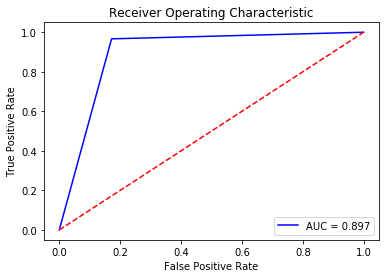

In [11]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Wow, looks like a Pretty good Score! for initial modelling, let us try out if you can further improve your model score.

# Tf-Idf
As already discussed earlier you will be using Tf-Idf technique, in this section you are going to create your document term matrix using `TfidfVectorizer()` available within sklearn.

There are some parameters which needs to be defined while building vocabullary or Tf-Idf matrix such as, `min_df` and `max_df`.  
 - `min_df` is used for removing terms that appear too infrequently. For example:    
 - `min_df` = 0.01 means "ignore terms that appear in less than 1% of the documents".  
 - `min_df` = 5 means "ignore terms that appear in less than 5 documents".  

The default `min_df` is 1.0, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.      

 - `max_df` is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:   
 - `max_df` = 0.50 means "ignore terms that appear in more than 50% of the documents".  
 - `max_df` = 25 means "ignore terms that appear in more than 25 documents".  

The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.  

Setting `min_df = 5` and `max_df = 1.0 (default)`  
Which means while building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold, which means not keeping words those do not occur in atleast 5 documents or reviews (in our context), this can be considered as a hyperparmater which directly affects accuracy of your model so you need to do a trial or a grid search to find what value of `min_df` or `max_df` gives best result, again it highly depends on your data. This value is also called cut-off in the literature.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5; 
# you can play with it and see how accuracy changes 
vect_tf = TfidfVectorizer(min_df=5).fit(X_train)

In [13]:
X_train_vectorized_tf = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized_tf, y_train)
predictions_tf = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions_tf))

AUC:  0.8974332776669326


# n-grams
Before going to n-grams let us first understand from where does this term comes and and what does it actually mean?
Unigram means a single word. In a unigram tagger, a single token is used to find the particular parts-of-speech tag.
So when you extend a token to be comprised of more than one word for example if a token is of size 2, is a "bigram" ; size 3 is a "trigram", "four-gram", "five-gram" and so on to **"n-grams"**.

<img src="http://recognize-speech.com/images/Antonio/Unigram.png">
[source](http://recognize-speech.com/language-model/n-gram-model/comparison)

Now a question arises why do you need n-grams when already have a pretty good model evaluation. Let us have a look why do you need this technique. 

In [31]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, now touch is not working'])))

[1 0]


The two given text still not identified correctly like which one is positive or negative. If you see the problem n-grams words for example, "an issue" is a bigram so you can introduce the usage of n-grams terms in our model and see the effect.

In [22]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [23]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9110661794597458


Here you can usng n-grams technique which increases the accuracy of model, but why? 

Text(0.5,0,'False Positive Rate')

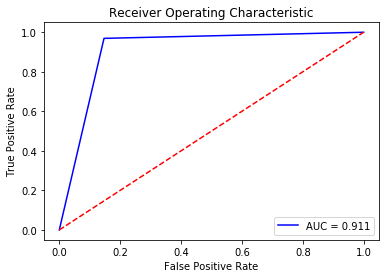

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Here is the reason why using n-grams increases the accuracy of model, by using bigrams it helps model to better understand sentiments of words such as, "no issue", "an issue".   
These reviews are now correctly identified, which was not possible until you have used n-grams technique. 

In [25]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, touch is not working'])))

[1 0]


In [36]:
# Try a random review but be sure the words belongs to document term matrix or dictionary built from training set!
print(model.predict(vect.transform(['when i click selfie i do not loo'])))

[1]


This is the effect of using n-grams based term-document matrix, hope you have a clear idea of how to use in your text classification model. 

## Conclusion
This Tutorial presents a minimal Text Analysis and classification application to Amazon Unlocked Mobile Reviews, Where you are classifying the labels as Positive and Negative based on the ratings of reviews. For Classification you have used a simple Logistic Regression Classifier to predict a Positive or Negative Review based on the review text, but you can further extend this tutorial using some other Classifier algorithm like Decision Tree or Naive bayes but since with logistic regression and using n-grams feature extraction methods we are getting more than 91% accuracy and just to make this tutorial limited and focussed on text classfication hence it does not require to use any other classifier in this tutorial. 

## References 

In [ ]:
Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering
R. He, J. McAuley
WWW, 2016